In [1]:
!pip install ultralytics albumentations opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
# Скачивание изображений и аннотаций (~1Гб)
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

# Распаковка
!unzip val2017.zip -d coco
!unzip annotations_trainval2017.zip -d coco


Streaming output truncated to the last 5000 lines.
 extracting: coco/val2017/000000365745.jpg  
 extracting: coco/val2017/000000320425.jpg  
 extracting: coco/val2017/000000481404.jpg  
 extracting: coco/val2017/000000314294.jpg  
 extracting: coco/val2017/000000335328.jpg  
 extracting: coco/val2017/000000513688.jpg  
 extracting: coco/val2017/000000158548.jpg  
 extracting: coco/val2017/000000132116.jpg  
 extracting: coco/val2017/000000415238.jpg  
 extracting: coco/val2017/000000321333.jpg  
 extracting: coco/val2017/000000081738.jpg  
 extracting: coco/val2017/000000577584.jpg  
 extracting: coco/val2017/000000346905.jpg  
 extracting: coco/val2017/000000433980.jpg  
 extracting: coco/val2017/000000228144.jpg  
 extracting: coco/val2017/000000041872.jpg  
 extracting: coco/val2017/000000117492.jpg  
 extracting: coco/val2017/000000368900.jpg  
 extracting: coco/val2017/000000376900.jpg  
 extracting: coco/val2017/000000352491.jpg  
 extracting: coco/val2017/000000330790.jpg  
 ext

In [3]:
# Скачиваем инструмент от Ultralytics
!git clone https://github.com/ultralytics/JSON2YOLO.git
!pip install pycocotools

Cloning into 'JSON2YOLO'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (275/275), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 447 (delta 245), reused 197 (delta 191), pack-reused 172 (from 2)
Receiving objects: 100% (447/447), 130.21 KiB | 5.42 MiB/s, done.
Resolving deltas: 100% (268/268), done.


In [4]:
!pip install -U sahi pycocotools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 11.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=1c656b324d33990c707ccee54517c2869f2873a8b641eed9820a2bd5dbd3f6f6
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.11.0.86
    Uninstalling opencv-python-4.11.0.86:
      Successfully uninstalled opencv-python-4.11.0.86


In [5]:
from sahi.utils.coco import Coco

# Реальные пути на Colab:
coco_annotation_file = '/content/coco/annotations/instances_val2017.json'
coco_images_dir = '/content/coco/val2017'
yolo_output_dir = '/content/coco2017_yolo'

# Создание объекта Coco
coco = Coco.from_coco_dict_or_path(
    coco_annotation_file,
    image_dir=coco_images_dir
)

# Конвертация в YOLO-формат (80% изображения используются в train)
coco.export_as_yolo(
    output_dir=yolo_output_dir,
    train_split_rate=0.8
)

100%|██████████| 1000/1000 [00:01<00:00, 718.93it/s]


Создание fisheye валидационных данных: 100%|██████████| 996/996 [00:31<00:00, 31.98it/s]


Создание реалистичного fisheye датасета завершено!
Тренировочные изображения: /content/coco2017_yolo_fisheye/train
Валидационные изображения: /content/coco2017_yolo_fisheye/val
YAML файл конфигурации: /content/coco2017_yolo_fisheye/data_fisheye.yml


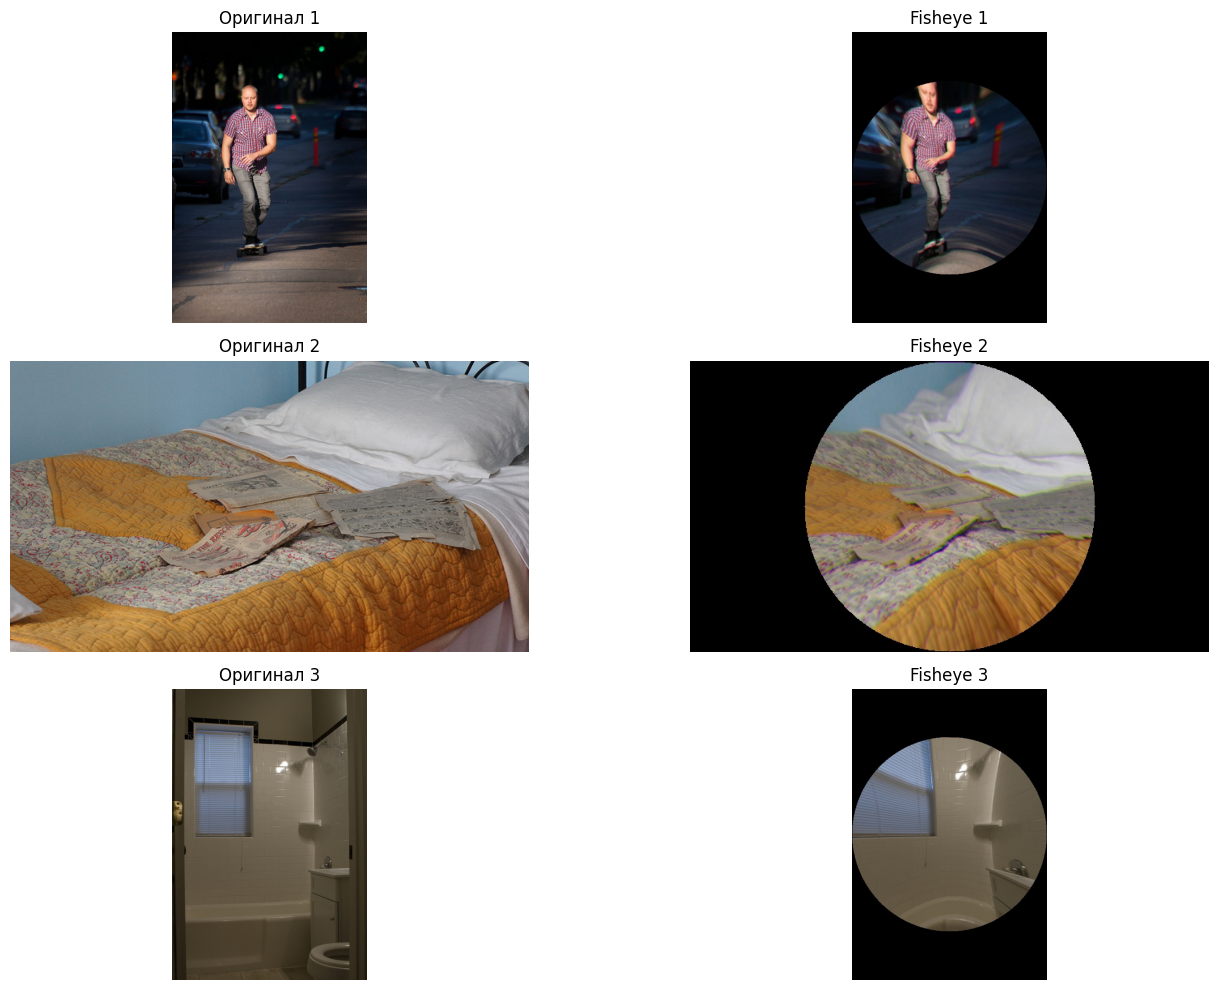

In [6]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm
import yaml
import math
from scipy.stats import truncnorm

# Пути к исходным изображениям и labels
images_dir = '/content/coco2017_yolo/train'
labels_dir = '/content/coco2017_yolo/train'

# Путь к новым данным
fisheye_images_dir = '/content/coco2017_yolo_fisheye/train'
fisheye_labels_dir = '/content/coco2017_yolo_fisheye/train'

os.makedirs(fisheye_images_dir, exist_ok=True)
os.makedirs(fisheye_labels_dir, exist_ok=True)

# Функция для создания более реалистичного эффекта fisheye
def apply_fisheye(image, strength=2.0, ellipticity=1.0, add_vignette=False, add_chromatic_aberration=False):
    """
    Создает реалистичный эффект fisheye с дополнительными эффектами
    Args:
        image: исходное изображение
        strength: сила искажения (1.0 - умеренное, 2.0 - сильное)
        ellipticity: эллиптичность искажения (1.0 - круговое, >1 - эллиптическое)
        add_vignette: добавлять ли виньетирование
        add_chromatic_aberration: добавлять ли хроматические аберрации
    Returns:
        искаженное изображение
    """
    height, width = image.shape[:2]
    x, y = np.meshgrid(np.arange(width), np.arange(height))

    # Нормализация координат
    x = (x - width/2) / (width/2)
    y = (y - height/2) / (height/2)

    # Применяем эллиптичность
    r = np.sqrt((x**2) + ((y*ellipticity)**2))
    theta = np.arctan2(y*ellipticity, x)

    # Искажение типа "рыбий глаз"
    r_new = np.arctan(r * strength) / (np.pi/2)

    # Преобразование обратно в декартовы координаты
    x_new = r_new * np.cos(theta) * width/2 + width/2
    y_new = r_new * np.sin(theta) / ellipticity * height/2 + height/2

    # Ограничение координат
    x_new = np.clip(x_new, 0, width-1).astype(np.float32)
    y_new = np.clip(y_new, 0, height-1).astype(np.float32)

    # Применяем искажение
    distorted = cv2.remap(image, x_new, y_new, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)

    if add_vignette:
        # Виньетирование
        rows, cols = distorted.shape[:2]  # Определяем размеры изображения
        kernel_x = cv2.getGaussianKernel(cols, cols/3)
        kernel_y = cv2.getGaussianKernel(rows, rows/3)
        kernel = kernel_y * kernel_x.T
        mask = 255 * kernel / np.linalg.norm(kernel)
        for c in range(3):
            distorted[:, :, c] = distorted[:, :, c] * mask

    if add_chromatic_aberration:
        # Хроматическая аберрация
        rows, cols = distorted.shape[:2]  # Определяем размеры изображения
        for c in range(3):
            shift = np.random.uniform(-2, 2)  # Случайный сдвиг для каждого канала
            M = np.float32([[1, 0, shift], [0, 1, shift]])
            distorted[:, :, c] = cv2.warpAffine(distorted[:, :, c], M, (cols, rows))

    # Маска для круглого вида
    mask = np.zeros((height, width), dtype=np.uint8)
    cv2.circle(mask, (width//2, height//2), int(min(width, height)/2), 255, -1)

    # Применение маски
    result = distorted.copy()
    for c in range(0, 3):
        result[:, :, c] = cv2.bitwise_and(result[:, :, c], mask)

    return result

# Функция для преобразования координат bbox в искаженное пространство
def transform_bbox_fisheye(bbox, width, height, strength=2.0, ellipticity=1.0):
    """
    Преобразует координаты bbox (формат YOLO) для соответствия искажению fisheye
    """
    x_center, y_center, w, h = bbox
    x1 = (x_center - w/2) * width
    y1 = (y_center - h/2) * height
    x2 = (x_center + w/2) * width
    y2 = (y_center + h/2) * height

    points = [[x1, y1], [x2, y1], [x1, y2], [x2, y2], [(x1+x2)/2, (y1+y2)/2]]
    transformed_points = []

    for x, y in points:
        x_norm = (x - width/2) / (width/2)
        y_norm = (y - height/2) / (height/2)
        r = math.sqrt(x_norm**2 + (y_norm*ellipticity)**2)
        theta = math.atan2(y_norm*ellipticity, x_norm)
        r_new = math.atan(r * strength) / (math.pi/2)
        x_new = r_new * math.cos(theta) * width/2 + width/2
        y_new = r_new * math.sin(theta) / ellipticity * height/2 + height/2
        x_new = min(max(0, x_new), width-1)
        y_new = min(max(0, y_new), height-1)
        transformed_points.append((x_new, y_new))

    xs = [p[0] for p in transformed_points[:4]]
    ys = [p[1] for p in transformed_points[:4]]
    new_center_x = transformed_points[4][0] / width
    new_center_y = transformed_points[4][1] / height
    new_width = (max(xs) - min(xs)) / width
    new_height = (max(ys) - min(ys)) / height

    return [
        min(max(0, new_center_x), 1),
        min(max(0, new_center_y), 1),
        min(max(0.01, new_width), 1),
        min(max(0.01, new_height), 1)
    ]

# Генерация случайной силы искажения с нормальным распределением
def get_random_strength():
    mean = 2.0
    std_dev = 0.5
    lower = 1.5
    upper = 3.0
    return truncnorm.rvs((lower - mean) / std_dev, (upper - mean) / std_dev, loc=mean, scale=std_dev)

# Обработка тренировочных данных
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in tqdm(image_files, desc='Создание реалистичной fisheye-аугментации'):
    img_path = os.path.join(images_dir, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    lbl_path = os.path.join(labels_dir, label_name)

    if not os.path.exists(img_path):
        continue

    image = cv2.imread(img_path)
    if image is None:
        continue

    height, width = image.shape[:2]
    fisheye_strength = get_random_strength()  # Улучшенная генерация силы искажения
    ellipticity = np.random.uniform(0.9, 1.1)  # Случайная эллиптичность
    add_vignette = np.random.rand() < 0.5     # Вероятность добавления виньетирования
    add_chromatic_aberration = np.random.rand() < 0.5  # Вероятность добавления хроматической аберрации

    fisheye_image = apply_fisheye(
        image,
        strength=fisheye_strength,
        ellipticity=ellipticity,
        add_vignette=add_vignette,
        add_chromatic_aberration=add_chromatic_aberration
    )

    bboxes = []
    class_labels = []
    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts[:5])
                    bboxes.append([x_center, y_center, bbox_width, bbox_height])
                    class_labels.append(int(class_id))
    else:
        continue

    transformed_bboxes = [
        transform_bbox_fisheye(bbox, width, height, strength=fisheye_strength, ellipticity=ellipticity)
        for bbox in bboxes
    ]

    aug_img_path = os.path.join(fisheye_images_dir, img_name)
    cv2.imwrite(aug_img_path, fisheye_image)

    aug_lbl_path = os.path.join(fisheye_labels_dir, label_name)
    with open(aug_lbl_path, 'w') as f:
        for bbox, cls in zip(transformed_bboxes, class_labels):
            x_center, y_center, bbox_width, bbox_height = bbox
            f.write(f"{cls} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# Обработка валидационных данных (аналогично тренировочным, но без случайности)
val_src = '/content/coco2017_yolo/val'
val_fisheye_dst = '/content/coco2017_yolo_fisheye/val'
os.makedirs(val_fisheye_dst, exist_ok=True)

val_image_files = [f for f in os.listdir(val_src) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_name in tqdm(val_image_files, desc='Создание fisheye валидационных данных'):
    img_path = os.path.join(val_src, img_name)
    label_name = os.path.splitext(img_name)[0] + '.txt'
    lbl_path = os.path.join(val_src, label_name)

    if not os.path.exists(img_path):
        continue

    image = cv2.imread(img_path)
    if image is None:
        continue

    height, width = image.shape[:2]
    fisheye_strength = 2.0  # Фиксированная сила искажения
    ellipticity = 1.0       # Без эллиптичности
    add_vignette = False    # Без виньетирования
    add_chromatic_aberration = False  # Без хроматических аберраций

    fisheye_image = apply_fisheye(
        image,
        strength=fisheye_strength,
        ellipticity=ellipticity,
        add_vignette=add_vignette,
        add_chromatic_aberration=add_chromatic_aberration
    )

    bboxes = []
    class_labels = []
    if os.path.exists(lbl_path):
        with open(lbl_path, 'r') as f:
            for line in f.readlines():
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id, x_center, y_center, bbox_width, bbox_height = map(float, parts[:5])
                    bboxes.append([x_center, y_center, bbox_width, bbox_height])
                    class_labels.append(int(class_id))
    else:
        continue

    transformed_bboxes = [
        transform_bbox_fisheye(bbox, width, height, strength=fisheye_strength, ellipticity=ellipticity)
        for bbox in bboxes
    ]

    aug_img_path = os.path.join(val_fisheye_dst, img_name)
    cv2.imwrite(aug_img_path, fisheye_image)

    aug_lbl_path = os.path.join(val_fisheye_dst, label_name)
    with open(aug_lbl_path, 'w') as f:
        for bbox, cls in zip(transformed_bboxes, class_labels):
            x_center, y_center, bbox_width, bbox_height = bbox
            f.write(f"{cls} {x_center:.6f} {y_center:.6f} {bbox_width:.6f} {bbox_height:.6f}\n")

# Копируем и адаптируем YAML файл для новых данных
original_yaml = '/content/coco2017_yolo/data.yml'
new_yaml = '/content/coco2017_yolo_fisheye/data_fisheye.yml'

with open(original_yaml, 'r') as file:
    data_yaml = yaml.safe_load(file)

fisheye_data_yaml = data_yaml.copy()
fisheye_data_yaml['train'] = fisheye_images_dir
fisheye_data_yaml['val'] = val_fisheye_dst
fisheye_data_yaml['path'] = os.path.dirname(fisheye_images_dir)

with open(new_yaml, 'w') as file:
    yaml.dump(fisheye_data_yaml, file, default_flow_style=False)

print(f'Создание реалистичного fisheye датасета завершено!')
print(f'Тренировочные изображения: {fisheye_images_dir}')
print(f'Валидационные изображения: {val_fisheye_dst}')
print(f'YAML файл конфигурации: {new_yaml}')

# Функция для визуализации результатов аугментации
def visualize_augmentation_examples():
    import matplotlib.pyplot as plt
    import random

    sample_images = random.sample(image_files, 3)
    plt.figure(figsize=(15, 10))

    for i, img_name in enumerate(sample_images):
        orig_path = os.path.join(images_dir, img_name)
        orig_img = cv2.imread(orig_path)
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

        fish_path = os.path.join(fisheye_images_dir, img_name)
        fish_img = cv2.imread(fish_path)
        fish_img = cv2.cvtColor(fish_img, cv2.COLOR_BGR2RGB)

        plt.subplot(3, 2, i*2+1)
        plt.title(f"Оригинал {i+1}")
        plt.imshow(orig_img)
        plt.axis('off')

        plt.subplot(3, 2, i*2+2)
        plt.title(f"Fisheye {i+1}")
        plt.imshow(fish_img)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Запуск визуализации
visualize_augmentation_examples()

In [7]:
# Установка необходимых библиотек
!pip install ultralytics opencv-python matplotlib pandas

# Импорт библиотек
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
# Список путей к моделям
model_paths = [
    '/content/original_model.pt',
    '/content/mixed_10_model.pt',
    '/content/mixed_20_model.pt',
    '/content/mixed_30_model.pt',
    '/content/mixed_40_model.pt',
    '/content/mixed_50_model.pt'
]

# Загрузка моделей
models = [YOLO(path) for path in model_paths]

In [10]:
# Путь к YAML файлам для нормальных и fisheye-датасетов
normal_val_yaml = '/content/coco2017_yolo/data.yml'  # Путь к нормальным данным
fisheye_val_yaml = '/content/coco2017_yolo_fisheye/data_fisheye.yml'  # Путь к fisheye-данным

# Словарь для хранения результатов
results = {
    'model': [],
    'normal_precision': [],  # Точность на нормальных данных
    'normal_recall': [],     # Полнота на нормальных данных
    'normal_mAP50': [],      # mAP50 на нормальных данных
    'normal_mAP50-95': [],   # mAP50-95 на нормальных данных
    'fisheye_precision': [], # Точность на fisheye-данных
    'fisheye_recall': [],    # Полнота на fisheye-данных
    'fisheye_mAP50': [],     # mAP50 на fisheye-данных
    'fisheye_mAP50-95': []   # mAP50-95 на fisheye-данных
}

# Оценка каждой модели
for i, model in enumerate(models):
    print(f"Оценка модели {i+1}/{len(models)}...")

    # Оценка на нормальных данных
    normal_metrics = model.val(data=normal_val_yaml)
    results['model'].append(f"Model_{i}")
    results['normal_precision'].append(normal_metrics.results_dict['metrics/precision(B)'])
    results['normal_recall'].append(normal_metrics.results_dict['metrics/recall(B)'])
    results['normal_mAP50'].append(normal_metrics.results_dict['metrics/mAP50(B)'])
    results['normal_mAP50-95'].append(normal_metrics.results_dict['metrics/mAP50-95(B)'])

    # Оценка на fisheye-данных
    fisheye_metrics = model.val(data=fisheye_val_yaml)
    results['fisheye_precision'].append(fisheye_metrics.results_dict['metrics/precision(B)'])
    results['fisheye_recall'].append(fisheye_metrics.results_dict['metrics/recall(B)'])
    results['fisheye_mAP50'].append(fisheye_metrics.results_dict['metrics/mAP50(B)'])
    results['fisheye_mAP50-95'].append(fisheye_metrics.results_dict['metrics/mAP50-95(B)'])

# Преобразование результатов в DataFrame
results_df = pd.DataFrame(results)
print(results_df)

Оценка модели 1/6...
Ultralytics 8.3.112 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


100%|██████████| 755k/755k [00:00<00:00, 25.8MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1727.7±711.5 MB/s, size: 147.4 KB)



val: Scanning /content/coco2017_yolo/val... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<00:00, 2091.20it/s]

val: /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000013923.jpg: ig


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:11<00:00,  4.46it/s]


                   all        842       5940      0.546      0.428      0.441      0.309
               bicycle        484       2030      0.667      0.641      0.689      0.457
                   car         31         63      0.542      0.238      0.289      0.137
            motorcycle         89        353      0.561      0.473      0.514      0.307
              airplane         26         34       0.63      0.765      0.708      0.405
                   bus         24         40      0.698      0.625      0.673      0.494
                 train         38         51      0.798      0.529      0.664      0.553
                 truck         26         27      0.779      0.741      0.817       0.64
                  boat         41         69      0.367      0.449      0.391       0.22
         traffic light         25         98      0.357      0.286      0.269      0.147
          fire hydrant         31        124      0.738      0.218       0.32      0.177
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<00:00, 2382.54it/s]

val: /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val:


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:08<00:00,  6.08it/s]


                   all        842       5940      0.232      0.119     0.0947     0.0246
               bicycle        484       2030      0.309      0.184      0.144     0.0341
                   car         31         63      0.349     0.0476     0.0593     0.0175
            motorcycle         89        353      0.118     0.0538     0.0235    0.00421
              airplane         26         34      0.255      0.235      0.193     0.0594
                   bus         24         40      0.514      0.325      0.322       0.11
                 train         38         51      0.296      0.157      0.153     0.0352
                 truck         26         27      0.442      0.481      0.413     0.0579
                  boat         41         69      0.134      0.087      0.052    0.00996
         traffic light         25         98      0.219      0.122     0.0734     0.0145
          fire hydrant         31        124          0          0    0.00193    0.00025
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000013923.jpg: ig


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:09<00:00,  5.56it/s]


                   all        842       5940      0.521      0.407      0.432      0.296
               bicycle        484       2030      0.659       0.65      0.694      0.457
                   car         31         63       0.52      0.222      0.297      0.134
            motorcycle         89        353      0.622       0.45      0.498       0.29
              airplane         26         34      0.611      0.646      0.689      0.408
                   bus         24         40      0.631      0.625      0.686       0.48
                 train         38         51      0.768      0.608      0.679      0.596
                 truck         26         27      0.662      0.778      0.815      0.637
                  boat         41         69      0.311      0.377      0.347      0.197
         traffic light         25         98      0.421      0.296      0.311      0.153
          fire hydrant         31        124      0.561       0.29      0.317       0.17
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val:


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:08<00:00,  6.06it/s]


                   all        842       5940      0.314       0.13      0.127     0.0397
               bicycle        484       2030      0.482      0.222      0.194     0.0542
                   car         31         63       0.66     0.0311     0.0691     0.0177
            motorcycle         89        353      0.195      0.034     0.0262    0.00433
              airplane         26         34      0.399      0.324      0.309     0.0907
                   bus         24         40       0.54      0.294      0.239      0.088
                 train         38         51      0.621      0.294       0.34      0.115
                 truck         26         27      0.811      0.637       0.71      0.197
                  boat         41         69      0.288     0.0725     0.0584     0.0166
         traffic light         25         98      0.239     0.0612     0.0495     0.0111
          fire hydrant         31        124      0.075    0.00806    0.00111   0.000371
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000013923.jpg: ig


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:10<00:00,  5.28it/s]


                   all        842       5940      0.535      0.403      0.431      0.295
               bicycle        484       2030      0.663      0.632      0.681       0.45
                   car         31         63      0.385      0.254      0.269      0.124
            motorcycle         89        353       0.63      0.445        0.5      0.289
              airplane         26         34      0.695      0.605      0.698      0.392
                   bus         24         40      0.733       0.65      0.691      0.491
                 train         38         51      0.726      0.588      0.631      0.554
                 truck         26         27      0.649      0.815      0.766      0.594
                  boat         41         69       0.34      0.304      0.306      0.168
         traffic light         25         98      0.442      0.296      0.333      0.167
          fire hydrant         31        124      0.572      0.302      0.324      0.183
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val:


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:12<00:00,  4.32it/s]


                   all        842       5940      0.267      0.156      0.147      0.049
               bicycle        484       2030      0.397      0.258      0.222     0.0673
                   car         31         63      0.208     0.0317     0.0608     0.0173
            motorcycle         89        353      0.274      0.051     0.0382    0.00708
              airplane         26         34      0.304      0.412      0.374      0.126
                   bus         24         40      0.417        0.3      0.237      0.086
                 train         38         51      0.425      0.373      0.393       0.15
                 truck         26         27      0.568      0.704      0.671      0.239
                  boat         41         69      0.267      0.087     0.0786     0.0284
         traffic light         25         98      0.178     0.0906     0.0499     0.0148
          fire hydrant         31        124          0          0    0.00121   0.000242
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000013923.jpg: ig


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:10<00:00,  5.22it/s]


                   all        842       5940      0.524      0.396      0.414      0.284
               bicycle        484       2030      0.651      0.634      0.672      0.439
                   car         31         63      0.698      0.222      0.265       0.12
            motorcycle         89        353      0.551      0.453      0.464      0.279
              airplane         26         34      0.515      0.676      0.667      0.411
                   bus         24         40      0.629      0.575      0.634      0.467
                 train         38         51      0.751      0.549       0.64      0.534
                 truck         26         27      0.803      0.778       0.78      0.592
                  boat         41         69      0.291      0.391      0.296      0.158
         traffic light         25         98      0.414      0.255      0.276      0.149
          fire hydrant         31        124      0.656      0.234      0.293      0.149
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val:


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:08<00:00,  5.96it/s]


                   all        842       5940      0.305       0.15      0.141       0.05
               bicycle        484       2030       0.42      0.241      0.216     0.0726
                   car         31         63      0.365     0.0476     0.0866     0.0336
            motorcycle         89        353      0.202     0.0429     0.0296    0.00587
              airplane         26         34      0.484      0.382      0.354       0.15
                   bus         24         40      0.535        0.3      0.269     0.0863
                 train         38         51      0.622      0.355       0.37      0.155
                 truck         26         27        0.7      0.704      0.663      0.213
                  boat         41         69      0.292      0.101     0.0926     0.0235
         traffic light         25         98      0.277     0.0918     0.0685     0.0164
          fire hydrant         31        124      0.161    0.00806    0.00225     0.0009
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000013923.jpg: ig


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:09<00:00,  5.36it/s]


                   all        842       5940      0.489       0.38      0.387      0.266
               bicycle        484       2030      0.645      0.621       0.67      0.432
                   car         31         63      0.461      0.254      0.278      0.133
            motorcycle         89        353      0.585      0.425       0.45      0.268
              airplane         26         34      0.583      0.698      0.701      0.347
                   bus         24         40       0.63       0.65      0.644      0.445
                 train         38         51      0.747      0.569      0.628      0.519
                 truck         26         27      0.566      0.778      0.779      0.606
                  boat         41         69      0.378      0.319      0.299      0.165
         traffic light         25         98       0.35      0.265      0.245      0.122
          fire hydrant         31        124      0.542      0.218      0.281      0.144
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val:


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:09<00:00,  5.54it/s]


                   all        842       5940      0.324      0.153      0.148     0.0508
               bicycle        484       2030      0.409      0.245      0.221     0.0722
                   car         31         63       0.66     0.0952       0.11     0.0302
            motorcycle         89        353      0.237     0.0283     0.0256    0.00587
              airplane         26         34      0.332      0.382      0.325      0.104
                   bus         24         40      0.442      0.275      0.219      0.079
                 train         38         51      0.668      0.333      0.346      0.142
                 truck         26         27      0.609      0.704      0.661      0.214
                  boat         41         69      0.388      0.101      0.105     0.0323
         traffic light         25         98       0.19      0.051     0.0587     0.0151
          fire hydrant         31        124      0.137    0.00806    0.00396    0.00107
             stop sig

val: Scanning /content/coco2017_yolo/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo/val/000000013923.jpg: ig


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:10<00:00,  5.17it/s]


                   all        842       5940      0.498      0.347      0.362      0.243
               bicycle        484       2030      0.635      0.639      0.653      0.413
                   car         31         63      0.489      0.159      0.169     0.0762
            motorcycle         89        353      0.591      0.408      0.432      0.239
              airplane         26         34      0.478      0.588      0.562      0.335
                   bus         24         40      0.572        0.5      0.553      0.389
                 train         38         51      0.613      0.588       0.61      0.512
                 truck         26         27      0.696      0.778        0.8      0.579
                  boat         41         69      0.272       0.29      0.232      0.141
         traffic light         25         98      0.512      0.184      0.207      0.107
          fire hydrant         31        124      0.403      0.229       0.26      0.136
             stop sig

val: Scanning /content/coco2017_yolo_fisheye/val.cache... 996 images, 10 backgrounds, 154 corrupt: 100%|██████████| 996/996 [00:00<?, ?it/s]

val: /content/coco2017_yolo_fisheye/val/000000000632.jpg: ignoring corrupt image/label: Label class 84 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000000802.jpg: ignoring corrupt image/label: Label class 82 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000001296.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000005001.jpg: ignoring corrupt image/label: Label class 87 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000007795.jpg: ignoring corrupt image/label: Label class 85 exceeds dataset class count 80. Possible class labels are 0-79
val: /content/coco2017_yolo_fisheye/val/000000010977.jpg: ignoring corrupt image/label: Label class 81 exceeds dataset class count 80. Possible class labels are 0-79
val:


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:08<00:00,  5.91it/s]


                   all        842       5940      0.313      0.159      0.149     0.0537
               bicycle        484       2030      0.393      0.246      0.212      0.073
                   car         31         63      0.295     0.0317     0.0822     0.0319
            motorcycle         89        353      0.139     0.0312      0.022    0.00452
              airplane         26         34      0.344      0.441      0.295      0.124
                   bus         24         40      0.525       0.25      0.288      0.124
                 train         38         51      0.431      0.412      0.417      0.169
                 truck         26         27      0.693      0.741      0.747       0.24
                  boat         41         69      0.229      0.087     0.0921     0.0289
         traffic light         25         98      0.328     0.0816     0.0801     0.0251
          fire hydrant         31        124          0          0   0.000937   9.37e-05
             stop sig

Model_0 : Это оригинальная модель, обученная только на нормальных изображениях.
Model_1–Model_5 : Эти модели обучены на смешанных датасетах с разной долей fisheye-изображений (10%, 20%, 30%, 40%, 50%).

##Производительность на нормальных изображениях
###Снижение метрик с увеличением доли fisheye-данных:
``Precision`` падает с 0.546 (Model_0) до 0.498 (Model_5).\
``Recall`` падает с 0.428 (Model_0) до 0.347 (Model_5).\
``mAP50`` падает с 0.441 (Model_0) до 0.362 (Model_5).\
``mAP50-95`` падает с 0.309 (Model_0) до 0.243 (Model_5).
###Причины снижения:
1. Модель начинает адаптироваться к fisheye-искажениям, что ухудшает её способность работать с нормальными изображениями.
2. Особенно заметно снижение recall, что говорит о том, что модель "пропускает" больше объектов на обычных изображениях.

##Производительность на fisheye-изображениях:
###Метрики:
``Precision (точность):`` Увеличивается с 0.232 (Model_0) до 0.313–0.324 (Model_1–Model_5).\
``Recall (полнота):`` Увеличивается с 0.119 (Model_0) до 0.158 (Model_5).\
``mAP50 и mAP50-95:`` Увеличиваются с 0.095 (Model_0) до 0.149 (Model_5) .
###Наблюдения:
1. Улучшение метрик с увеличением доли fisheye-данных :
- Все метрики (precision, recall, mAP50, mAP50-95) значительно улучшаются при добавлении fisheye-данных.\
- Лучшие результаты достигаются для Model_5 (50% fisheye).
2. Особенности улучшений :
- Recall растёт быстрее, чем precision, что говорит о том, что модель лучше находит объекты, но всё ещё делает много ложноположительных предсказаний.
- mAP50 и mAP50-95 показывают стабильный рост, что подтверждает общее улучшение качества детекции.

##Трейдофф между normal и fisheye
###Расчёт tradeoff:
1. Normal sacrifice (потеря на нормальных данных):
 - Разница между mAP50 Model_0 и текущей моделью.
Например, для Model_1: Normal sacrifice=0.441−0.432=0.009.
2. Fisheye improvement (улучшение на fisheye-данных):
 - Разница между mAP50 Model_0 и текущей моделью.
Например, для Model_1: Fisheye improvement=0.127−0.095=0.032.
3. Tradeoff ratio (соотношение улучшения и потери):
 - Tradeoff ratio = Fisheye improvement / Normal sacrifice

##Выводы
1. Лучший трейдофф:
 - Model_2 (20% fisheye) показывает наилучший баланс между потерей на нормальных данных и улучшением на fisheye-данных (tradeoff ratio = 5.20).
 - Она теряет всего 0.010 mAP50 на нормальных данных, но улучшает mAP50 на fisheye-данных на 0.052 .
2. Максимальное улучшение на fisheye:
 - Model_5 (50% fisheye) показывает лучшие результаты на fisheye-данных (mAP50 = 0.149), но сильно теряет на нормальных данных (mAP50 = 0.362).



image 1/1 /content/coco2017_yolo_fisheye/val/000000072795.jpg: 480x640 5 bicycles, 9.2ms
Speed: 3.0ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/coco2017_yolo_fisheye/val/000000072795.jpg: 480x640 4 bicycles, 14.1ms
Speed: 2.1ms preprocess, 14.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/coco2017_yolo_fisheye/val/000000072795.jpg: 480x640 4 bicycles, 10.4ms
Speed: 2.4ms preprocess, 10.4ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/coco2017_yolo_fisheye/val/000000072795.jpg: 480x640 4 bicycles, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/coco2017_yolo_fisheye/val/000000072795.jpg: 480x640 4 bicycles, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/coco2017_yolo_fisheye/val/000000072795.jpg

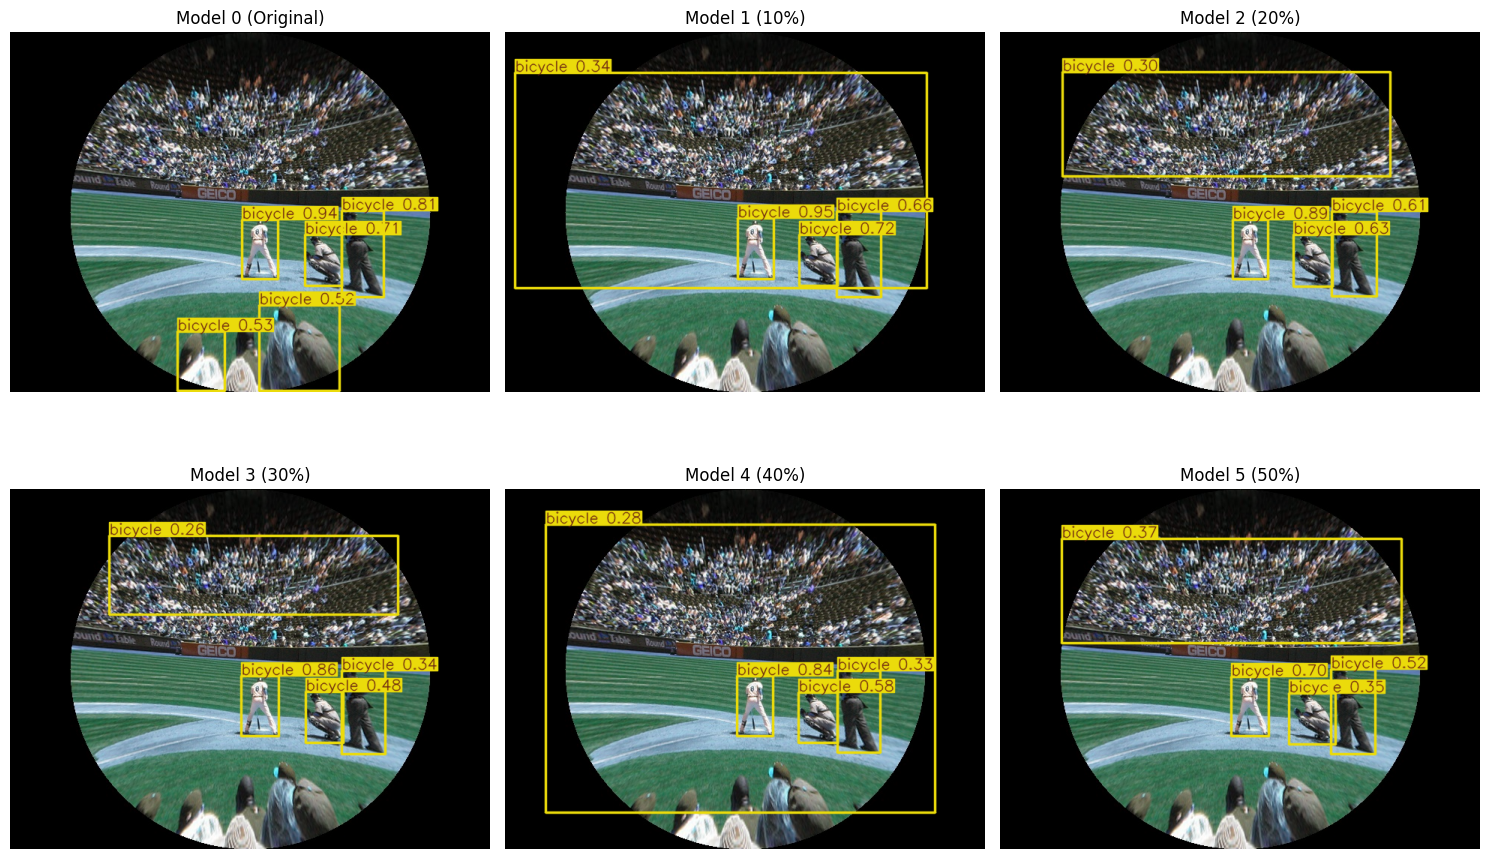

In [169]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os

# Путь к fisheye-валидационному набору данных
fisheye_val_dir = '/content/coco2017_yolo_fisheye/val'

# Выбор случайного fisheye-изображения
fisheye_images = [f for f in os.listdir(fisheye_val_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random_image_name = random.choice(fisheye_images)
fisheye_image_path = os.path.join(fisheye_val_dir, random_image_name)

# Загрузка изображения
image = cv2.imread(fisheye_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Загрузка всех моделей
model_paths = [
    '/content/original_model.pt',
    '/content/mixed_10_model.pt',
    '/content/mixed_20_model.pt',
    '/content/mixed_30_model.pt',
    '/content/mixed_40_model.pt',
    '/content/mixed_50_model.pt'
]
models = [YOLO(path) for path in model_paths]

# Визуализация результатов
plt.figure(figsize=(15, 10))

for i, model in enumerate(models):
    # Детекция объектов
    results = model(fisheye_image_path)
    plotted_image = results[0].plot()  # Получение изображения с bounding box'ами

    # Отображение
    plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца
    plt.title(f"Model {i} ({['Original', '10%', '20%', '30%', '40%', '50%'][i]})")
    plt.imshow(plotted_image)
    plt.axis('off')

plt.tight_layout()
plt.show()